In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-07-07 12:55:19.217514: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 12:55:19.248147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 12:55:19.249069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-07 12:55:19.798873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIoT2023_noniid1IPCASTD10%.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814248 entries, 0 to 1814247
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PC1          float64
 1   PC2          float64
 2   PC3          float64
 3   PC4          float64
 4   PC5          float64
 5   PC6          float64
 6   PC7          float64
 7   PC8          float64
 8   PC9          float64
 9   PC10         float64
 10  PC11         float64
 11  PC12         float64
 12  PC13         float64
 13  PC14         float64
 14  PC15         float64
 15  PC16         float64
 16  PC17         float64
 17  PC18         float64
 18  PC19         float64
 19  PC20         float64
 20  PC21         float64
 21  PC22         float64
 22  PC23         float64
 23  Attack Type  object 
dtypes: float64(23), object(1)
memory usage: 332.2+ MB


In [4]:
print("Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:


(1814248, 24)

In [5]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 0


In [6]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [7]:
print("Ukuran Dataset Sesudah Drop Duplikat:")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:


(1814248, 24)

In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PC1,1814248.0,-1.716975e-16,2.915653,-2.497921,-1.135235,-0.990949,-0.635271,95.936398
PC2,1814248.0,8.228480e-17,1.965499,-8.209362,-1.429408,-0.066807,0.290474,96.867841
PC3,1814248.0,-4.057921e-16,1.801754,-54.292194,-1.167726,-0.108024,1.651040,13.407128
PC4,1814248.0,6.299232e-17,1.761883,-19.239166,-0.221755,0.035511,0.483102,17.286257
PC5,1814248.0,2.966874e-16,1.640489,-159.849885,-0.001899,0.007305,0.047738,0.547462
PC6,1814248.0,4.115415e-16,1.467985,-39.626688,-0.658945,-0.055390,1.403067,27.718871
PC7,1814248.0,3.770571e-17,1.405647,-4.706586,-0.322873,-0.153837,0.408936,138.345302
PC8,1814248.0,-2.468152e-17,1.358285,-1.764894,-0.032700,-0.004135,0.027332,785.065611
PC9,1814248.0,1.787961e-16,1.330170,-48.183883,-0.324079,0.495513,0.565106,26.212884
PC10,1814248.0,-4.880534e-16,1.286768,-10.917804,-0.115936,0.032921,0.241531,29.882182


In [9]:
print("Jumlah Serangan Pada Dataset:")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset:


Attack Type
DDoS              1221567
DoS                361461
Mirai              118537
BENIGN              73194
Network Attack      24894
Recon               13429
Brute Force           546
Injection             481
Malware               139
Name: count, dtype: int64

In [10]:
label_map = {
        'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'Mirai': 3,
        'Network Attack': 4, 'Recon': 5, 'Brute Force': 6,
        'Injection': 7, 'Malware': 8,
    }
dataset["Attack Type"] = dataset["Attack Type"].map(label_map)

In [11]:
features = dataset.drop('Attack Type',axis=1)
labels = dataset["Attack Type"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [13]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)

print("X_test:",x_test.shape)
print("y_test:",y_test.shape)

X_train: (1451398, 23)
y_train: (1451398,)
X_test: (362850, 23)
y_test: (362850,)


In [14]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train, num_classes=9)
y_test_cat = to_categorical(y_test, num_classes=9)

In [15]:
# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 9 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-07-07 12:55:42.600219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-07 12:55:42.600593: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
22679/22679 [==============================] - 27s 1ms/step - loss: 0.3494 - accuracy: 0.8329 - val_loss: 0.3466 - val_accuracy: 0.8453
Epoch 2/5
22679/22679 [==============================] - 26s 1ms/step - loss: 0.3042 - accuracy: 0.8648 - val_loss: 0.4044 - val_accuracy: 0.8753
Epoch 3/5
22679/22679 [==============================] - 26s 1ms/step - loss: 0.2740 - accuracy: 0.8813 - val_loss: 0.3689 - val_accuracy: 0.8934
Epoch 4/5
22679/22679 [==============================] - 26s 1ms/step - loss: 0.2271 - accuracy: 0.9054 - val_loss: 0.4067 - val_accuracy: 0.9025
Epoch 5/5
11340/11340 [==============================] - 9s 784us/step - loss: 0.3654 - accuracy: 0.9223
Test Loss: 0.36535021662712097
Test Accuracy: 0.9222819209098816
11340/11340 [==============================] - 7s 657us/step
Confusion Matrix:
[[ 13868     45      1      0    411    304      0      0      0]
 [     8 233936  10427     13     38     11      0      0      0]
 [     2  13040  58851     26     2

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      0.95      0.88     14629
           1       0.95      0.96      0.95    244433
           2       0.85      0.82      0.83     71943
           3       1.00      0.99      1.00     23794
           4       0.80      0.57      0.66      5037
           5       0.68      0.54      0.60      2767
           6       1.00      0.12      0.21       110
           7       1.00      0.03      0.05       110
           8       0.00      0.00      0.00        27

    accuracy                           0.92    362850
   macro avg       0.79      0.55      0.58    362850
weighted avg       0.92      0.92      0.92    362850



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


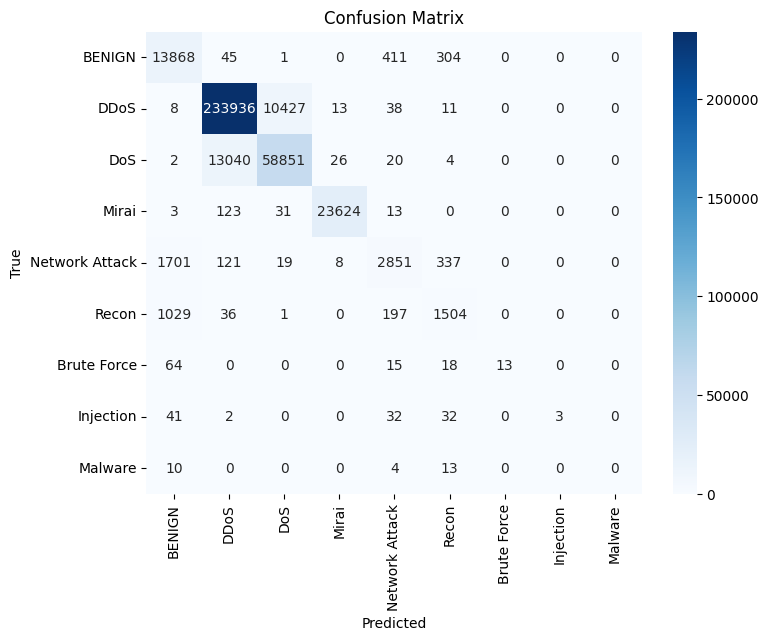

In [16]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
